In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

In [4]:
training_set = train_datagen.flow_from_directory(
      'Covid/xray_dataset_covid19/train',
      target_size = (224,244),
      # color_mode = "grayscale",
      batch_size = 32,
      class_mode = "binary"
    )

testing_set = test_datagen.flow_from_directory(
      'Covid/xray_dataset_covid19/test',
      target_size = (224,244),
      # color_mode = "grayscale",
      batch_size = 32,
      class_mode = "binary"
    )

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [6]:
model = VGG16(
      input_shape = (244,244,3),
      include_top = False,
      weights = 'imagenet'
    )


In [7]:
for layers in model.layers:
  layers.trainable = False

In [8]:
x = Flatten()(model.output)
x = Dense(4096, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(1, activation = "sigmoid")(x)

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

In [17]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(244,244,3))
base_model.trainable = False

In [31]:
flatten_layer = keras.layers.Flatten()#(base_model.output)
dense_layer_1 = keras.layers.Dense(50, activation='relu')
dense_layer_2 = keras.layers.Dense(20, activation='relu')
prediction_layer = keras.layers.Dense(1, activation='sigmoid')


model = keras.models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

# model = flatten_layer(base_model)
# model = model(dense_layer_1)
# model = model(dense_layer_2)
# model = model(prediction_layer)

In [32]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 25088)             0         
                                                                 
 dense_34 (Dense)            (None, 50)                1254450   
                                                                 
 dense_35 (Dense)            (None, 20)                1020      
                                                                 
 dense_36 (Dense)            (None, 1)                 21        
                                                                 
Total params: 15,970,179
Trainable params: 1,255,491
Non-trainable params: 14,714,688
_________________________________________________________________


In [33]:
hist = model.fit(training_set,validation_data = training_set, epochs = 10)

Epoch 1/10
5/5 [==============================] - 7s 1s/step - loss: 0.6980 - accuracy: 0.6892 - val_loss: 0.1591 - val_accuracy: 0.9459
Epoch 2/10
5/5 [==============================] - 6s 1s/step - loss: 0.1340 - accuracy: 0.9392 - val_loss: 0.0475 - val_accuracy: 0.9932
Epoch 3/10
5/5 [==============================] - 6s 1s/step - loss: 0.0464 - accuracy: 0.9865 - val_loss: 0.0263 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 6s 1s/step - loss: 0.0281 - accuracy: 0.9932 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 6s 1s/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 5s 1s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 10s 2s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 8/10
5/5 [========================

In [ ]:
hist = hist.history

Text(0, 0.5, 'accuracy')

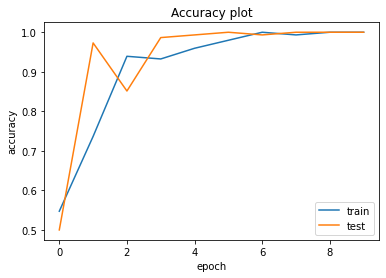

In [ ]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

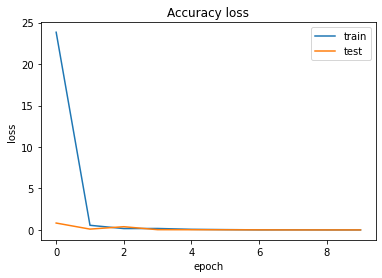

In [ ]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")